<center><h1>Data Preparation and Exploratory Data Analysis (EDA)</h1></center> 

First, it is described the general aspects of the dataset. Then, the missing data is imputed. It is commented distribution plots before and after imputation. Finally, the scaling of the data and the visualization of the correlations between variables were carried out.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.getcwd()

'C:\\Users\\marco\\OneDrive\\Escritorio\\ESTUDIOS\\master ciencia de datos\\Practicas IFCA'

Loading the dataset

In [3]:
dfHeart = pd.read_csv(".\datasets\heart.csv")

In [4]:
dfHeart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
dfHeart['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

-  Age: Age (years), numerical variable.
-  Sex: Gender; categorical variable (M, F)
-  ChestPainType: Chest pain type; categorical variable (TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic)
-  RestingBP: Resting blood pressure; numerical variable (mm Hg)
-  Cholesterol: serum cholesterol; numerical variable (mm/dL)
-  FastingBS: Fasting blood sugar; categorical variable (1: if FastingBS > 120 mg/dL, 0: otherwise)
-  RestingECG: Resting electrocardiogram results (Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: Showing probable or definite left ventricular hypertrophy by Estes' criteria); categorical variable.
-  MaxHR: Maximum heart rate achieved; numerical variable.
-  ExerciseAngina: exercise-induced angina; categorical variable (Y: Yes, N: No)
-  Oldpeak: Feature in the heart disease dataset that represents the ST depression (mm) induced by exercise relative to rest; numerical variable.
-  ST_Slope: The slope of the peak exercise ST segment (Up: upsloping, Flat: flat, Down: downsloping); categorical variable.
-  HeartDisease: Target variable (1: heart disease, 0: Normal); categorical variable.

Obtaining information about data count, null values, data types, etc.

In [6]:
dfHeart.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Printing general drescriptive statistics.

In [7]:
dfHeart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<!-- This datasets contains at least 11 features that can be used to predict a possible heart disease. The five datasets used:
- Cleveland: 303 observations
- Hungarian: 294 observations
- Switzerland: 123 observations
- Long Beach VA: 200 observations
- Stalog (Heart) Data Set: 270 observations "https://archive.ics.uci.edu/ml/datasets/statlog+(heart)" -->

Proportion of classes:

Not heart disease (y = 0), heart disease (y = 1).

1    508
0    410
Name: HeartDisease, dtype: int64

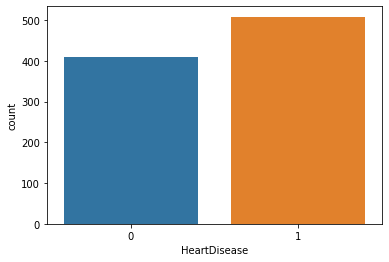

In [8]:
sns.countplot(x = "HeartDisease", data = dfHeart)
dfHeart.loc[:, 'HeartDisease'].value_counts()

Representing distribution diagrams (histogram, violinplot and countplot):

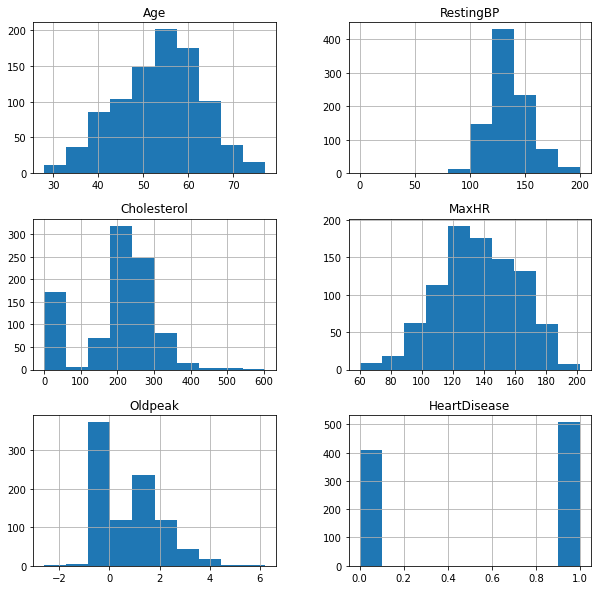

In [9]:
histRaw = dfHeart.drop(columns=['FastingBS']).hist(figsize = (10,10))

In [10]:
# calculate the IQR for each numerical column
Q1 = dfHeart.quantile(0.25)
Q3 = dfHeart.quantile(0.75)
IQR = Q3 - Q1

# align the indices
dfHeart, Q1 = dfHeart.align(Q1, join='left', axis=1)
dfHeart, Q3 = dfHeart.align(Q3, join='left', axis=1)
dfHeart, IQR = dfHeart.align(IQR, join='left', axis=1)

# identify outliers in each column
outliers = ((dfHeart < (Q1 - 1.5 * IQR)) | (dfHeart > (Q3 + 1.5 * IQR))).sum()
print(outliers)

Age                 0
Sex                 0
ChestPainType       0
RestingBP          28
Cholesterol       183
FastingBS         214
RestingECG          0
MaxHR               2
ExerciseAngina      0
Oldpeak            16
ST_Slope            0
HeartDisease        0
dtype: int64


In outliers, we can ignore FastingBS because it is a categorical variable. Comparing outliers with the histograms we can deduce that Cholesterol appears to have missing values in form of zero values. Oldpeak and RestingBP also could have null values in form of zero values.

In [11]:
len(dfHeart.loc[dfHeart["Cholesterol"] == 0,["Cholesterol"]])

172

In [12]:
len(dfHeart.loc[dfHeart["RestingBP"] == 0,["RestingBP"]])

1

In [13]:
dfHeart[dfHeart['RestingBP'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [14]:
Q1 = dfHeart["RestingBP"].quantile(0.25)
Q3 = dfHeart["RestingBP"].quantile(0.75)
IQR = Q3 - Q1
print(dfHeart.loc[((dfHeart["RestingBP"] < (Q1 - 1.5 * IQR)) | (dfHeart["RestingBP"] > (Q3 + 1.5 * IQR))), ["RestingBP"]])

     RestingBP
109        190
123        180
189        180
190        180
241        200
274        180
275        180
278        180
314         80
365        200
372        185
399        200
411        180
423        180
449          0
475        178
550        172
585        180
592        190
673        174
702        178
725        180
732        200
759        192
774        178
780        180
855        180
880        172


In [15]:
df_temp = dfHeart.loc[((dfHeart["RestingBP"] < (Q1 - 1.5 * IQR)) | (dfHeart["RestingBP"] > (Q3 + 1.5 * IQR))), ["RestingBP"]]
df_temp.loc[df_temp['RestingBP'] != 0,['RestingBP']].min()

RestingBP    80
dtype: int64

In [16]:
df_temp.loc[df_temp['RestingBP'] > 80,['RestingBP']].min()

RestingBP    172
dtype: int64

All the outliers of RestingBP could be real except one zero value (heart not functioning). Values higher than 150 mm Hg are considered hypertensive crisis and requires urgent medical attention.

Plotting a modified histogram for the variable "Oldpeak" with a bin for each value:

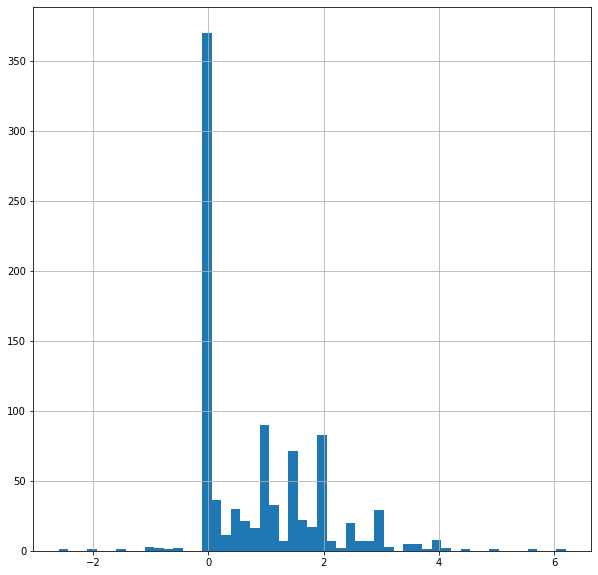

In [17]:
num_bins = len(dfHeart['Oldpeak'].unique())
dfHeart['Oldpeak'].hist(bins=num_bins,figsize = (10,10))
plt.show()

In [18]:
len(dfHeart.loc[dfHeart["Oldpeak"] == 0,["Oldpeak"]])

368

Without domain knowledge, it is difficult to determine if the variable "Oldpeak" have NaN values in form of zero values. 0 mm of ST segment could be correct and common, specially in patients without heart disease as we can see in violinplot.

In [19]:
dfHeart[['Cholesterol','RestingBP']] = dfHeart[['Cholesterol','RestingBP']].replace(0,np.NaN)

In [20]:
dfHeart[['Cholesterol','RestingBP']].describe().loc[['mean','50%']]

,Cholesterol,RestingBP
mean,244.635389,132.540894
50%,237.000000,130.000000


When the mean is very different from the median, it is said to have a skewed distribution.

In [21]:
medians_0 = dfHeart.loc[dfHeart["HeartDisease"] == 0, ['Cholesterol','RestingBP']].median()
medians_1 = dfHeart.loc[dfHeart["HeartDisease"] == 1, ['Cholesterol','RestingBP']].median()

In [22]:
dfHeart.loc[(dfHeart["HeartDisease"] == 0) & (dfHeart['Cholesterol'].isna()), 'Cholesterol'] = medians_0['Cholesterol']
dfHeart.loc[(dfHeart["HeartDisease"] == 1) & (dfHeart['Cholesterol'].isna()), 'Cholesterol'] = medians_1['Cholesterol']
dfHeart.loc[(dfHeart["HeartDisease"] == 1) & (dfHeart['RestingBP'].isna()), 'RestingBP'] = medians_1['RestingBP']

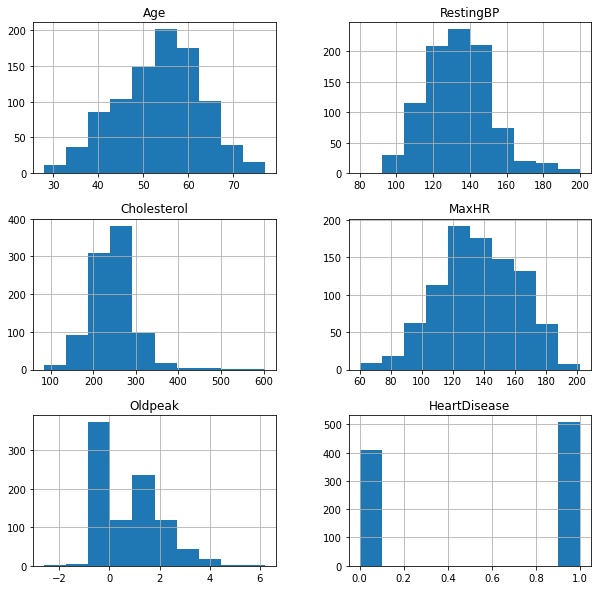

In [23]:
histClean = dfHeart.drop(columns=['FastingBS']).hist(figsize = (10,10))

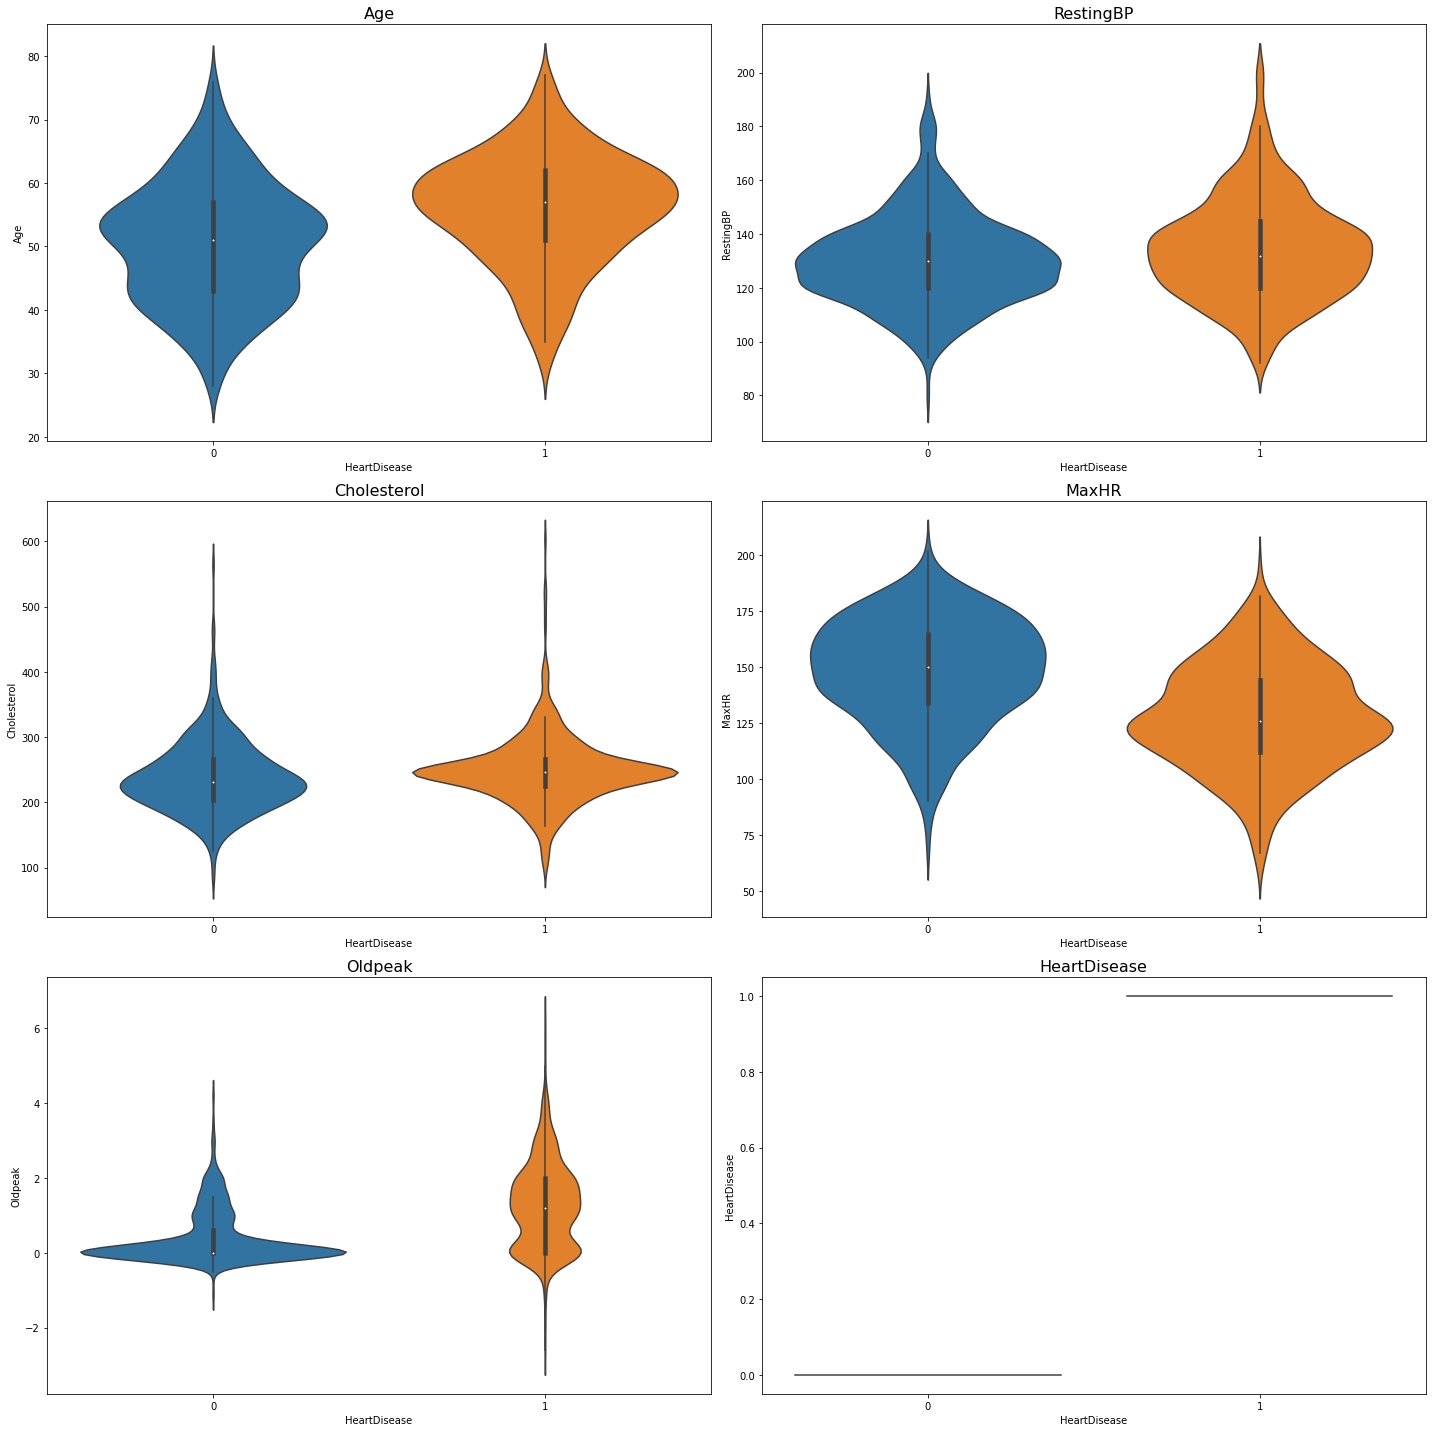

In [24]:
# Define the number of rows and columns for the subplots
nrows, ncols = 3,2

# Create a figure and axes for the subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 20))

# Flatten the axes array
axes = axes.flatten()

# Select the columns to plot
df_vp = dfHeart.loc[:,['Age','RestingBP','Cholesterol','MaxHR','Oldpeak','HeartDisease']]

# Loop over the columns of the DataFrame and plot each column in a separate subfigure
for i, col in enumerate(df_vp.columns):
    sns.violinplot(x="HeartDisease", y =col, data=df_vp, ax=axes[i])
    
# Set the title of each subfigure to the name of the corresponding column
for ax, col in zip(axes, df_vp.columns):
    ax.set_title(col, fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

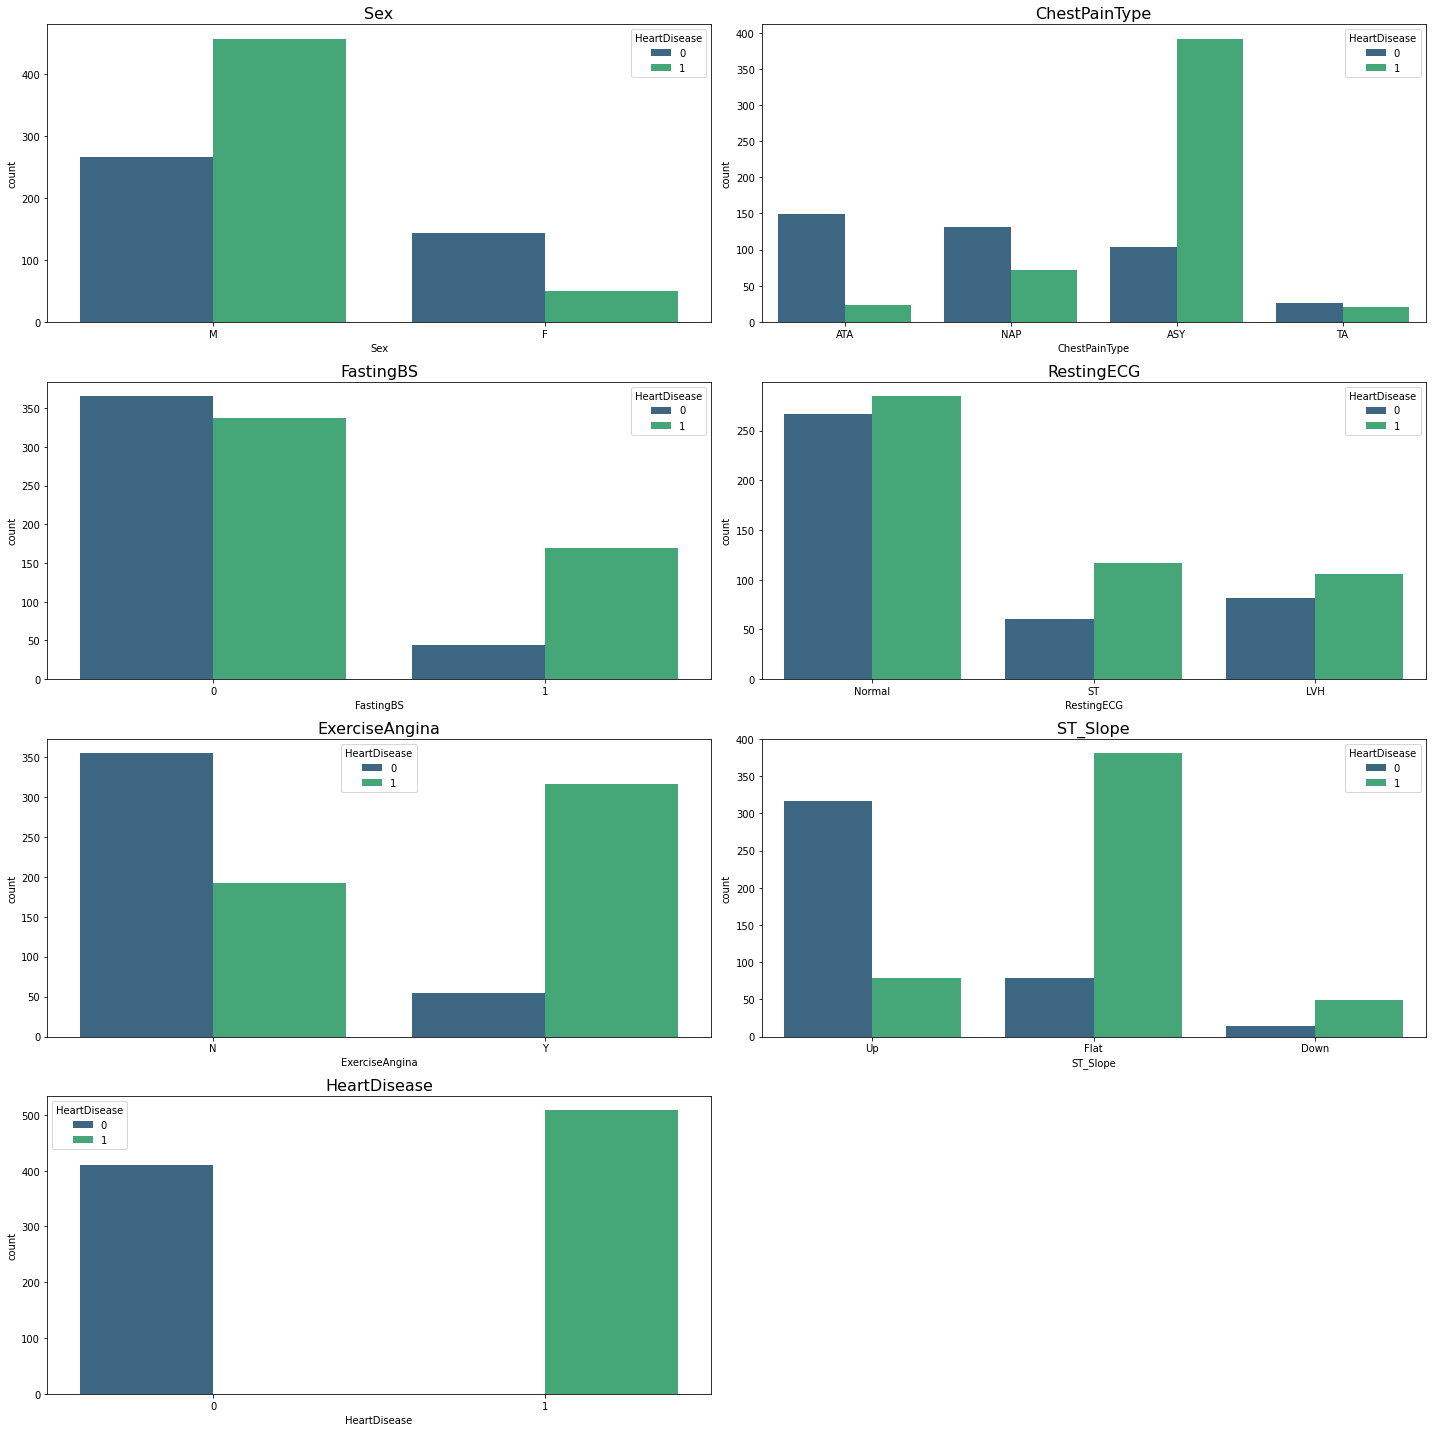

In [25]:
# Define the number of rows and columns for the subplots
nrows, ncols = 4, 2

# Create a figure and axes for the subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 20))

# Flatten the axes array
axes = axes.flatten()

# Select the columns to plot
df_count = dfHeart.drop(columns=['Age','RestingBP','Cholesterol','MaxHR','Oldpeak'])
# Loop over the columns of the DataFrame and plot each column in a separate subfigure
for i, col in enumerate(df_count.columns):
    sns.countplot(x = col, data = df_count, palette = 'viridis', hue = 'HeartDisease',ax=axes[i])    
# Set the title of each subfigure to the name of the corresponding column
for ax, col in zip(axes, df_count.columns):
    ax.set_title(col, fontsize=16)

fig.delaxes(axes[-1])
# Show the plot
plt.tight_layout()
plt.show()

In [26]:
dfHeart.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    float64
 4   Cholesterol     918 non-null    float64
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 86.2+ KB


One-hot encoding to use categorical variables in ML models.

In [27]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of the OneHotEncoder class
onehot_encoder = OneHotEncoder(sparse_output=True)

# Encode the 'Sex', 'ST_Slope', 'ChestPainType', 'ExerciseAngina' and 'RestingECG' columns using one-hot encoding
onehot_sparse = onehot_encoder.fit_transform(dfHeart[['Sex', 'ST_Slope','ChestPainType','ExerciseAngina','RestingECG']])
# Convert the encoded data to a pandas DataFrame
onehot_df = pd.DataFrame.sparse.from_spmatrix(onehot_sparse, columns=onehot_encoder.get_feature_names_out(['Sex', 'ST_Slope','ChestPainType','ExerciseAngina','RestingECG']))

# Concatenate the one-hot encoded data with the original data
dfHeart = pd.concat([onehot_df,dfHeart], axis=1)

# Drop the original 'Sex', 'ST_Slope', 'ChestPainType', 'ExerciseAngina' and 'RestingECG' columns
dfHeart = dfHeart.drop(['Sex', 'ST_Slope', 'ChestPainType', 'ExerciseAngina', 'RestingECG'], axis=1)

In [28]:
dfHeart.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype             
---  ------             --------------  -----             
 0   Sex_F              918 non-null    Sparse[float64, 0]
 1   Sex_M              918 non-null    Sparse[float64, 0]
 2   ST_Slope_Down      918 non-null    Sparse[float64, 0]
 3   ST_Slope_Flat      918 non-null    Sparse[float64, 0]
 4   ST_Slope_Up        918 non-null    Sparse[float64, 0]
 5   ChestPainType_ASY  918 non-null    Sparse[float64, 0]
 6   ChestPainType_ATA  918 non-null    Sparse[float64, 0]
 7   ChestPainType_NAP  918 non-null    Sparse[float64, 0]
 8   ChestPainType_TA   918 non-null    Sparse[float64, 0]
 9   ExerciseAngina_N   918 non-null    Sparse[float64, 0]
 10  ExerciseAngina_Y   918 non-null    Sparse[float64, 0]
 11  RestingECG_LVH     918 non-null    Sparse[float64, 0]
 12  RestingECG_Normal  918 non-null    Sparse[float64, 0]
 13  Resti

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

dfHeartScaled = dfHeart.copy()
dfHeartScaled.iloc[:,14:] = scaler.fit_transform(dfHeartScaled.iloc[:,14:])

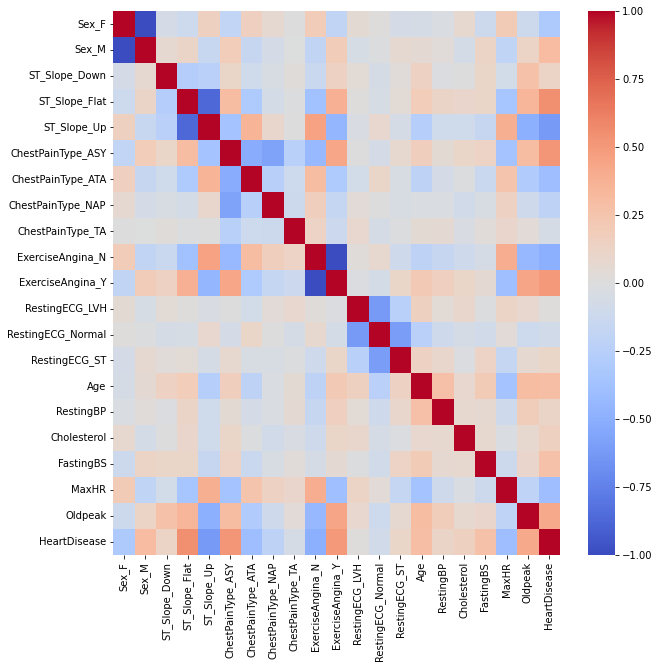

In [30]:
# Calculating correlation
corr_df = dfHeartScaled.corr(method ='spearman')
# Creating heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_df, annot=False, cmap='coolwarm')

# Showing heatmap
plt.show()

In [31]:
dfHeartScaled.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype             
---  ------             --------------  -----             
 0   Sex_F              918 non-null    Sparse[float64, 0]
 1   Sex_M              918 non-null    Sparse[float64, 0]
 2   ST_Slope_Down      918 non-null    Sparse[float64, 0]
 3   ST_Slope_Flat      918 non-null    Sparse[float64, 0]
 4   ST_Slope_Up        918 non-null    Sparse[float64, 0]
 5   ChestPainType_ASY  918 non-null    Sparse[float64, 0]
 6   ChestPainType_ATA  918 non-null    Sparse[float64, 0]
 7   ChestPainType_NAP  918 non-null    Sparse[float64, 0]
 8   ChestPainType_TA   918 non-null    Sparse[float64, 0]
 9   ExerciseAngina_N   918 non-null    Sparse[float64, 0]
 10  ExerciseAngina_Y   918 non-null    Sparse[float64, 0]
 11  RestingECG_LVH     918 non-null    Sparse[float64, 0]
 12  RestingECG_Normal  918 non-null    Sparse[float64, 0]
 13  Resti

In [41]:
# stack() function converts the correlation matrix into a long format, 
# where each row contains a pair of columns and their correlation
# reset_index() function converts the row and column indexes into regular columns
corr_pairs_greater = corr_df[corr_df > 0.25].stack().reset_index()
corr_pairs_less = corr_df[corr_df < -0.25].stack().reset_index()

# Eliminating duplicates
corr_pairs_greater = corr_pairs_greater[corr_pairs_greater['level_0'] < corr_pairs_greater['level_1']]
corr_pairs_less = corr_pairs_less[corr_pairs_less['level_0'] < corr_pairs_less['level_1']]

# Formatting the output
corr_pairs_greater = corr_pairs_greater.rename(columns={'level_0':'col1', 'level_1':'col2', 0:'corr'})
corr_pairs_less = corr_pairs_less.rename(columns={'level_0':'col1', 'level_1':'col2', 0:'corr'})

corr_pairs_greater = corr_pairs_greater.sort_values(by='corr', ascending=False)
corr_pairs_less = corr_pairs_less.sort_values(by='corr', ascending=True)

corr_pairs_greater = corr_pairs_greater.reset_index(drop=True)
corr_pairs_less = corr_pairs_less.reset_index(drop=True)

# Combining the tables
from IPython.display import display_html

# Applying CSS to the tables
styles = [dict(selector='table', props=[('margin', '0 auto')]),
          dict(selector='th', props=[('text-align', 'center'),                                      
                                     ('padding', '5px'),                                     
                                     ('background-color', '#0074D9'),                                     
                                     ('color', 'white')]),
          dict(selector='td', props=[('padding', '5px'),                                     
                                     ('text-align', 'center')]),
          dict(selector='th:first-child, td:first-child', props=[('text-align', 'left')])]

html_greater = corr_pairs_greater.to_html()
html_less = corr_pairs_less.to_html()

display_html(f'<table><tr><td>{html_greater}</td><td>{html_less}</td></tr></table>',
             raw=True, 
             # applying styles
             metadata={'text/html': {'isolated': 'True',
                                     'container': '%s',
                                     'styles': styles}})

,col1,col2,corr
0,HeartDisease,ST_Slope_Flat,0.554134
1,ChestPainType_ASY,HeartDisease,0.516716
2,ExerciseAngina_Y,HeartDisease,0.494282
3,ExerciseAngina_N,ST_Slope_Up,0.455676
4,ExerciseAngina_Y,Oldpeak,0.444806
5,ChestPainType_ASY,ExerciseAngina_Y,0.430034
6,HeartDisease,Oldpeak,0.419046
7,ExerciseAngina_N,MaxHR,0.391819
8,MaxHR,ST_Slope_Up,0.389926
9,ExerciseAngina_Y,ST_Slope_Flat,0.382237


As expected, many of the negative Spearman correlation values belong to the same categorical variable, now separated into numerics by one-hot coding. Ignoring this correlations we have the following table.

In [45]:
pattern = '([A-z]{4})'
# Apply regex to extract first 4 words from col1 and col2
corr_pairs_greater['col1_first4'] = corr_pairs_greater['col1'].str.extract(pattern, expand=False)
corr_pairs_greater['col2_first4'] = corr_pairs_greater['col2'].str.extract(pattern, expand=False)

corr_pairs_less['col1_first4'] = corr_pairs_less['col1'].str.extract(pattern, expand=False)
corr_pairs_less['col2_first4'] = corr_pairs_less['col2'].str.extract(pattern, expand=False)

# Filter out rows where the first 4 words are the same
corr_pairs_greater = corr_pairs_greater[corr_pairs_greater['col1_first4'] != corr_pairs_greater['col2_first4']]
corr_pairs_less = corr_pairs_less[corr_pairs_less['col1_first4'] != corr_pairs_less['col2_first4']]

# Drop the first4 columns
corr_pairs_greater = corr_pairs_greater.drop(['col1_first4', 'col2_first4'], axis=1)
corr_pairs_less = corr_pairs_less.drop(['col1_first4', 'col2_first4'], axis=1)

# Formatting the output
corr_pairs_greater = corr_pairs_greater.reset_index(drop=True)
corr_pairs_less = corr_pairs_less.reset_index(drop=True)

# Combining the tables
from IPython.display import display_html

# Applying CSS to the tables
styles = [dict(selector='table', props=[('margin', '0 auto')]),
          dict(selector='th', props=[('text-align', 'center'),                                     
                                     ('padding', '5px'),                                     
                                     ('background-color', '#0074D9'),                                     
                                     ('color', 'white')]),
          dict(selector='td', props=[('padding', '5px'),                           
                                     ('text-align', 'center')]),
          dict(selector='th:first-child, td:first-child', props=[('text-align', 'left')])]

html_greater = corr_pairs_greater.to_html()
html_less = corr_pairs_less.to_html()

display_html(f'<table><tr><td>{html_greater}</td><td>{html_less}</td></tr></table>',
             raw=True, 
             # applying styles
             metadata={'text/html': {'isolated': 'True',
                                     'container': '%s',
                                     'styles': styles}})

,col1,col2,corr
0,HeartDisease,ST_Slope_Flat,0.554134
1,ChestPainType_ASY,HeartDisease,0.516716
2,ExerciseAngina_Y,HeartDisease,0.494282
3,ExerciseAngina_N,ST_Slope_Up,0.455676
4,ExerciseAngina_Y,Oldpeak,0.444806
5,ChestPainType_ASY,ExerciseAngina_Y,0.430034
6,HeartDisease,Oldpeak,0.419046
7,ExerciseAngina_N,MaxHR,0.391819
8,MaxHR,ST_Slope_Up,0.389926
9,ExerciseAngina_Y,ST_Slope_Flat,0.382237


Source: https://www.datacamp.com/tutorial/feature-selection-python

Having now 20 variables instead of 11 and highly correlated variables PCA would be a good option to try. However, PCA is not always the best option and it may not necessarily improve the performance of the model in all cases. It's recommended to try different techniques for feature selection and dimensionality reduction, and evaluate their performance using appropriate metrics before choosing the final approach. For that reason, it will be try in addition one feature selection technique.

The chi-squared test technique assumes that the data being analyzed consists of non-negative values. Nevertheless, Oldpeak variable has a range of -2.6 to 6.2.

Recursive Feature Elimination (RFE) relies on the model coefficients to determine the importance of features, and when features are highly correlated, the coefficients can be unstable and therefore the feature importance ranking can also be unstable.

Ridge regression technique, a type of L2 regularization, works well when there are many correlated predictor variables. However, they may not be suitable for all types of data or models. For example, if the data has a large number of predictors relative to the number of observations, L2-regularization may not be effective.

In general, a **rule of thumb is to have at least 10-20 observations per predictor variable**. In this case, we will have 688 data points in the next train part for ML algorithms and 20 variables, so we have approximately 34 observations per variable, which is reasonable.

**Source: Hastie, T., Tibshirani, R., & Friedman, J. (2009). The elements of statistical learning: Data mining, inference, and prediction. Springer Science & Business Media.**

Ridge regression works by adding a penalty term, represented by the parameter alpha, to the sum of squared differences between the predicted and actual values. This penalty term encourages the model to select coefficients that are small, effectively shrinking them towards zero. By doing so, Ridge regression is able to reduce the impact of high variance in the dataset and improve the model's ability to generalize to new, unseen data. Overall, Ridge regression is a useful technique for balancing bias and variance in linear regression models and improving their overall performance.

Saving in a CSV.

In [34]:
dfHeart.to_csv(".\datasets\heart_ConditionalMeanImputation.csv",index=False)